# Assignment overview <ignore>
The overarching goal of this assignment is to produce a research report in which you implement, analyse, and discuss various Neural Network techniques. You will be guided through the process of producing this report, which will provide you with experience in report writing that will be useful in any research project you might be involved in later in life.

All of your report, including code and Markdown/text, ***must*** be written up in ***this*** notebook. This is not typical for research, but is solely for the purpose of this assignment. Please make sure you change the title of this file so that XXXXXX is replaced by your candidate number. You can use code cells to write code to implement, train, test, and analyse your NNs, as well as to generate figures to plot data and the results of your experiments. You can use Markdown/text cells to describe and discuss the modelling choices you make, the methods you use, and the experiments you conduct. So that we can mark your reports with greater consistency, please ***do not***:

* rearrange the sequence of cells in this notebook.
* delete any cells, including the ones explaining what you need to do.

If you want to add more code cells, for example to help organise the figures you want to show, then please add them directly after the code cells that have already been provided. 

Please provide verbose comments throughout your code so that it is easy for us to interpret what you are attempting to achieve with your code. Long comments are useful at the beginning of a block of code. Short comments, e.g. to explain the purpose of a new variable, or one of several steps in some analyses, are useful on every few lines of code, if not on every line. Please do not use the code cells for writing extensive sentences/paragraphs that should instead be in the Markdown/text cells.

# Abstract/Introduction (instructions) - 15 MARKS <ignore>
Use the next Markdown/text cell to write a short introduction to your report. This should include:
* a brief description of the topic (image classification) and of the dataset being used (CIFAR10 dataset). (2 MARKS)
* a brief description of how the CIFAR10 dataset has aided the development of neural network techniques, with examples. (3 MARKS)
* a descriptive overview of what the goal of your report is, including what you investigated. (5 MARKS)
* a summary of your major findings. (3 MARKS)
* two or more relevant references. (2 MARKS)

*Enter your abstract/introduction here*

# Methodology (instructions) - 55 MARKS <ignore>
Use the next cells in this Methodology section to describe and demonstrate the details of what you did, in practice, for your research. Cite at least two academic papers that support your model choices. The overarching prinicple of writing the Methodology is to ***provide sufficient details for someone to replicate your model and to reproduce your results, without having to resort to your code***. You must include at least these components in the Methodology:
* Data - Decribe the dataset, including how it is divided into training, validation, and test sets. Describe any pre-processing you perform on the data, and explain any advantages or disadvantages to your choice of pre-processing. 
* Architecture - Describe the architecture of your model, including all relevant hyperparameters. The architecture must include 3 convolutional layers followed by two fully connected layers. Include a figure with labels to illustrate the architecture.
* Loss function - Describe the loss function(s) you are using, and explain any advantages or disadvantages there are with respect to the classification task.
* Optimiser - Describe the optimiser(s) you are using, including its hyperparameters, and explain any advantages or disadvantages there are to using that optimser.
* Experiments - Describe how you conducted each experiment, including any changes made to the baseline model that has already been described in the other Methodology sections. Explain the methods used for training the model and for assessing its performance on validation/test data.


## Data (7 MARKS) <ignore>

*Describe the dataset and any pre-processing here*

SD 1 MEAN 0

## Architecture (17 MARKS) <ignore>

*Describe the architecture here*

## Loss function (3 MARKS) <ignore>

*Describe the loss function here*

## Optimser (4 MARKS) <ignore>

*Describe the optimiser here*

## Experiments <ignore>
### Experiment 1 (8 MARKS)

*Describe how you went about conducting experiment 1 here*

### Experiment 2 (8 MARKS) <ignore>

*Describe how you went about conducting experiment 2 here*

### Experiment 3 (8 MARKS) <ignore>

*Describe how you went about conducting experiment 3 here*

In [1]:
############################################
### Code for building the baseline model ###
############################################

###
# Collecting imports and loading dataset.
###

import torch


device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")



Using device: cpu


In [4]:
###
# Load and Normalise Dataset into batches
###
import torchvision.transforms as transforms
import torchvision.datasets as datasets


# Normalisation dict fn thing, taken from Lab 6's code to normalise CIFAR-10 dataset to mean 0, SD 1.
transform = {
    'train':transforms.Compose([
        transforms.Resize(32),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(32),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


# Batch size to use in dataloaders
BATCH_SIZE = 32


# Fetch training dataset and normalise it.
full_train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform['train'])

# Don't create train loader here as dataset needs to be split in differnet ways for later experiemnts
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)



# Create Testing Dataset
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform['test'])
# Create Testing dataloader
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)




# fetch a batch of images and labels for testing (not the NN kind, the mess about to see if things are working kind)
print("Fetching one sample batch from test data.")
dataiter = iter(test_loader)
sample_images, sample_labels = next(dataiter)




# Define Classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# Create class to ID mapping
id2classes = {idx:clss for idx, clss in enumerate(classes)}

# Create ID to class mapping
classes2id = {clss:idx for idx,clss in id2classes.items()}


Files already downloaded and verified
Files already downloaded and verified
Fetching one sample batch from test data.


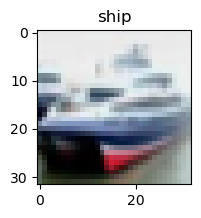

In [5]:
###
# Handy functions for later
###
import numpy as np
import matplotlib.pyplot as plt



def imshow(inp, title=None):
    """
    Shows an image from a Tensor representation.
    Taken from Lab 6 work
    """
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(2, 2))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated



imshow(sample_images[1], id2classes[int(sample_labels[1])])

In [6]:
###
# Create the Network itsself
###

import torch.nn as nn
import torch.nn.functional as F

class BaselineNetwork(nn.Module):
    

    def __init__(self):
        """
            Creates the network.
        """
        super().__init__()
        # Create first cnn layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=0) 
        # Create second cnn layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Create third cnn layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=48, kernel_size=3, stride=1, padding=1)

        # Create pooling layer used throughout
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Pooling layer to downsample representations.

        # Create first linear layer
        self.fc1 = nn.Linear(in_features=48*3*3, out_features=160)
        # Create second linear layer
        self.fc2 = nn.Linear(in_features=160, out_features=10)


    def forward(self, x):
        """
            Performs a forward pass of a batch / instance
        """
        # ---- Convolution Layers ----
        # First CNN layer
        x = self.pool(F.relu(self.conv1(x)))
        # Second CNN layer
        x = self.pool(F.relu(self.conv2(x))) 
        # Third CNN layer
        x = self.pool(F.relu(self.conv3(x)))

        # ---- Linear Layers ----
        # Flatten to use in Linear Layers
        x = x.view(-1, 48*3*3)
        # First Linear Layer
        x = F.relu(self.fc1(x))
        # Second Linear Layer. Doesn't use an activation
        x = self.fc2(x)
        # No softmax function is used here as loss fn handles it.
        
        # Return results
        return x

    



In [10]:
##
# Code Testing CNN's layer sizes are correct, mainly just to validate the model is actually built correctly.
##

test_net = BaselineNetwork()

print(f"Batch size: {len(sample_images)}")

x0 = sample_images
print(f"x0 shape is: {x0.shape}")
x1 = F.relu(test_net.conv1(x0))
print(f"x1 shape is: {x1.shape}")
x2 = test_net.pool(x1)
print(f"x2 shape is: {x2.shape}")
x3 = F.relu(test_net.conv2(x2))
print(f"x3 shape is: {x3.shape}")
x4 = test_net.pool(x3)
print(f"x4 shape is: {x4.shape}")
x5 = F.relu(test_net.conv3(x4))
print(f"x5 shape is: {x5.shape}")
x6 = test_net.pool(x5)
print(f"x6 shape is: {x6.shape}")
x7 = x6.view(-1, 48*3*3)
print(f"x7 shape is: {x7.shape}")
x8 = F.relu(test_net.fc1(x7))
print(f"x8 shape is: {x8.shape}")
x9 = F.relu(test_net.fc2(x8))
print(f"x9 shape is: {x9.shape}")

pred_logits = test_net.forward(sample_images)
assert list(pred_logits.shape) == [32, 10], "Network does not output expected logits."

del [test_net, pred_logits, x0, x1, x2, x3, x4, x5, x6, x7, x8, x9]

Batch size: 32
x0 shape is: torch.Size([32, 3, 32, 32])
x1 shape is: torch.Size([32, 16, 30, 30])
x2 shape is: torch.Size([32, 16, 15, 15])
x3 shape is: torch.Size([32, 32, 15, 15])
x4 shape is: torch.Size([32, 32, 7, 7])
x5 shape is: torch.Size([32, 48, 7, 7])
x6 shape is: torch.Size([32, 48, 3, 3])
x7 shape is: torch.Size([32, 432])
x8 shape is: torch.Size([32, 160])
x9 shape is: torch.Size([32, 10])


# Results (instructions) - 55 MARKS <ignore>
Use the Results section to summarise your findings from the experiments. For each experiment, use the Markdown/text cell to describe and explain your results, and use the code cell (and additional code cells if necessary) to conduct the experiment and produce figures to show your results.

### Experiment 1 (17 MARKS) <ignore>

*Write up results for Experiment 1 here*

In [16]:
#############################
### Code for Experiment 1 ###
#############################

import random 

##
# Splitting training data into subsets of training and validation subsets using 80:20 ratio.
##

def exp1_create_train_val_split(seed):
    """
    Creates a train/validation split of 80:20 for experiment 1. 
    Split is randomised based on a provided seed.

    Arguments:
        seed: the seed to use for the splitter
    
    Returns:
        Tuple of training dataloader and validation dataloader
    """
    
    # Create generator from provided seed
    generator = torch.Generator().manual_seed(seed)
    
    # Split larger training dataset into a training subset and validation subset.
    train_subset, val_subset = torch.utils.data.random_split(full_train_set, [0.8, 0.2], generator)
    
    # Create dataloader for the training subset
    train_sub_loader = torch.utils.data.DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    # Create dataloader for validation subset.
    val_sub_loader = torch.utils.data.DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    
    # return the two
    return train_sub_loader, val_sub_loader



def exp1_train(model, dataloader, loss_fn, optimizer, device):
    """Train Experiment 1's model on a single pass through the dataloader.

    Args:
        model: The model to perform the epoch on
        dataloader: The dataloader to use.
        loss_fn: The loss Criterion to use.
        optimizer: the optimizer to use, this is set up with the experiment's learning rate.
        device: The device to train on.
    
    Returns:
        model: The updated model.
        all_train_true_labels: the true training labels from all batches for this epoch.
        all_train_predicted_labels: the predicted training labels from all batches for this epoch.
        average_batch_loss: the average training loss over all of the batches for this epoch. 
        

    """

    
    # Put model into training mode
    model.train()

    # Create loss tracking variable
    running_loss = 0

    # Create prediction tracking lists
    all_train_predicted_labels = []
    all_train_true_labels = []


    # For each batch in the dataloader...
    for _, data in enumerate(dataloader,0):
        
        # Get model inputs, data is a list of [inputs, labels]
        inputs, labels = data
        
        # Accumulate true labels from this batch into all true labels list
        all_train_true_labels.extend(labels.tolist())

        # transfer input and labels over to device.
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients.
        optimizer.zero_grad()

        # Perform a forward pass.
        outputs = model(inputs)

        # Get predicted labels for each item in batch
        _, batch_train_predicted_labels = torch.max(outputs, 1)
        # Accumulate predicted labels from this batch into all predictions list
        all_train_predicted_labels.extend(batch_train_predicted_labels.tolist())
        


        
        # Get this batches loss
        loss = loss_fn(outputs, labels)
        # Calculate updated gradients
        loss.backward()
        # Perform network Optimisation
        optimizer.step()

        # get Loss statistics and update running total
        current_loss = loss.item()
        running_loss += current_loss

    # calculate the average batch loss over this epoch.
    average_batch_loss = running_loss / len(dataloader)

    return model, all_train_true_labels, all_train_predicted_labels, average_batch_loss



def exp1_evaluate(model, dataloader, loss_fn, device):
    """
    Evaluate Experiment 1's model through one pass of the dataloader.

    Args:
        model: The model to evaluate
        dataloader: The dataloader to evaluate the model on
        loss_fn: The loss function to use
        device: The device to perform the evaluation on.

    Returns:
        model: The model after evaluation
        all_val_true_labels: All of the true labels from the batches in this epoch.
        all_val_predicted_labels: All of the predicted labels from the batches in this epoch.
        average_batch_loss: The average validation loss over all of the batches in the epoch.
    """


    
    # Put model into evaluation mode
    model.eval()

    # Create loss tracking variable
    running_loss = 0

    # Create prediction tracking lists
    all_val_true_labels = []
    all_val_predicted_labels = []


    # don't worry about gradients during validation  
    with torch.no_grad:

        #over all batches...
        for _, data in enumerate(dataloader, 0):
            
            # Get the model inputs and labels of this batch
            inputs, labels = data

            # Accumulate the true labels of this batch into the all true values list
            all_val_true_labels.extend(labels.tolist())

            # move inputs and labels over to device.
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Perform a forward pass.
            outputs = model(inputs)

            # Get predicted labels for each item in batch
            _, batch_val_predicted_labels = torch.max(outputs, 1)
            # Accumulate predicted labels from this batch into all predictions list
            all_val_predicted_labels.extend(batch_val_predicted_labels.tolist())

            #calculate this batches loss
            loss = loss_fn(outputs, labels)
            current_loss = loss.item()

            running_loss += current_loss

    # calculate the average loss over every batch.
    average_batch_loss = running_loss / len(dataloader)

    return model, all_val_true_labels, all_val_predicted_labels, average_batch_loss


def do_experiment():
    opti
    
# Keep using the GPT2 Task 1 colab notebook, it's so damn helpful.





SyntaxError: invalid syntax (3646559868.py, line 99)

In [15]:
###
# Main Experiment Loop.
###

from tqdm import tqdm
import torch.optim as optim


# define learning rates to test
learning_rates = [1e-1, 1e-2, 1e-3, 1e-4, 0]


# iterate over each learning rate.
for lr in tqdm(learning_rates, desc="Progress through learning rates"):
    # iterate over 5 different sets of training/validation data.
    for test_idx in tqdm(range(5), desc="Progress through 5 averaging loops"):
        
        # Randomise seed for each iteration
        random_seed = random.randint(0, 1000)
        
        # Create dataloaders for training and validation subsets,
        exp1_train_loader, exp1_val_loader = exp1_create_train_val_split(random_seed)
        
        model = BaselineNetwork()
        
        # Define loss criteria - using cross entropy loss as this is multi-class classificaiton problem.
        criterion = nn.CrossEntropyLoss()

        # Create optimizer. Optimizer 
        optimizer = optimizer.SGD(BaselineNetwork.parameters(), lr=lr) 

        for i, data in enumerate(exp1_train_loader, 0):
            
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

        



Progress through learning rates: 100%|██████████| 5/5 [00:12<00:00,  2.52s/it]


In [ ]:
###
# Scheduler Experiment Loop
###

### Experiment 2 (19 MARKS) <ignore>

*Write up results for Experiment 2 here*

In [2]:
#############################
### Code for Experiment 2 ###
#############################

### Experiment 3 (19 MARKS) <ignore>

*Write up results for Experiment 3 here*

In [ ]:
#############################
### Code for Experiment 3 ###
#############################

# Conclusions and Discussion (instructions) - 25 MARKS <ignore>
In this section, you are expected to:
* briefly summarise and describe the conclusions from your experiments (8 MARKS).
* discuss whether or not your results are expected, providing scientific reasons (8 MARKS).
* discuss two or more alternative/additional methods that may enhance your model, with scientific reasons (4 MARKS). 
* Reference two or more relevant academic publications that support your discussion. (4 MARKS)

*Write your Conclusions/Discussion here*

# References (instructions) <ignore>
Use the cell below to add your references. A good format to use for references is like this:

[AB Name], [CD Name], [EF Name] ([year]), [Article title], [Journal/Conference Name] [volume], [page numbers] or [article number] or [doi]

Some examples:

JEM Bennett, A Phillipides, T Nowotny (2021), Learning with reinforcement prediction errors in a model of the Drosophila mushroom body, Nat. Comms 12:2569, doi: 10.1038/s41467-021-22592-4

SO Kaba, AK Mondal, Y Zhang, Y Bengio, S Ravanbakhsh (2023), Proc. 40th Int. Conf. Machine Learning, 15546-15566

*List your references here*